In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
with open('features_list.bin', 'rb') as f:
    features_list = pickle.load(f)
    f.close()

In [5]:
scaler = StandardScaler()

In [6]:
scaled_features_list = []
for features in features_list:
    scaled_features_list.append(scaler.fit_transform(features))

In [7]:
features_scaled_list = []
kmeans_list = []
for idx in range(5):
    features_scaled = pd.DataFrame(data=scaled_features_list[idx],
                                   index=features_list[idx].index,
                                   columns=features_list[idx].columns)
    kmeans = KMeans(n_clusters=3, random_state=16)
    kmeans.fit(features_scaled)
    features_scaled['cluster'] = kmeans.labels_
    features_scaled_list.append(features_scaled)
    kmeans_list.append(kmeans)

In [24]:
def cluster_centers_visualize(idx):
    fig, ax = plt.subplots(3, 1, figsize=(12,6), sharex=True, sharey=True)
    ax = ax.ravel()
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.title('INIT')
    for i in range(kmeans_list[idx].n_clusters):
        ax[i].set_title(f'Cluster {i}')
        sns.barplot(np.arange(features_list[idx].columns.size), kmeans_list[idx].cluster_centers_[i], ax=ax[i])
        ax[i].set_xticks(np.arange(features_list[idx].columns.size))
        ax[i].set_xticklabels(features_list[idx].columns, rotation=90)

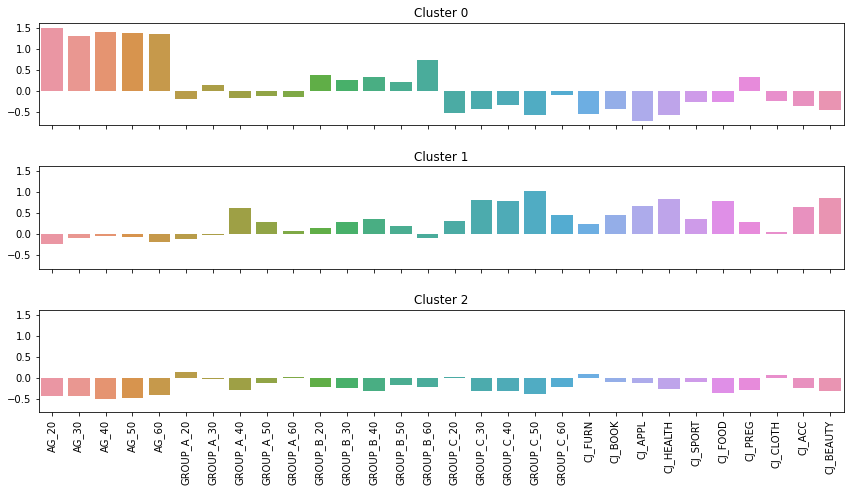

In [29]:
cluster_centers_visualize(0)